# Introduction to numerical modeling, part 2


### Goals

- Identify some ways in which numerical models are used in geoscience
- Define ordinary and partial differential equation
- Explain briefly what the finite-difference method is
- Write a program that implements a finite-difference solution to an ODE
- Recognize the basic elements of a forward-time, center-space finite-difference solution to the diffusion equation

## What is a numerical model?

- Numerical model: computer program that calculates a solution to equations and/or algorithms that represent a particular system

- Example: [https://www.youtube.com/watch?v=n0mupl4FZsQ](https://www.youtube.com/watch?v=n0mupl4FZsQ)

## How are models used?

1. Make calculations using a (more or less) trusted theory/model.

Examples:

  - Calculating stresses on a planned bridge or building
  - Calculating the orbit of a satellite

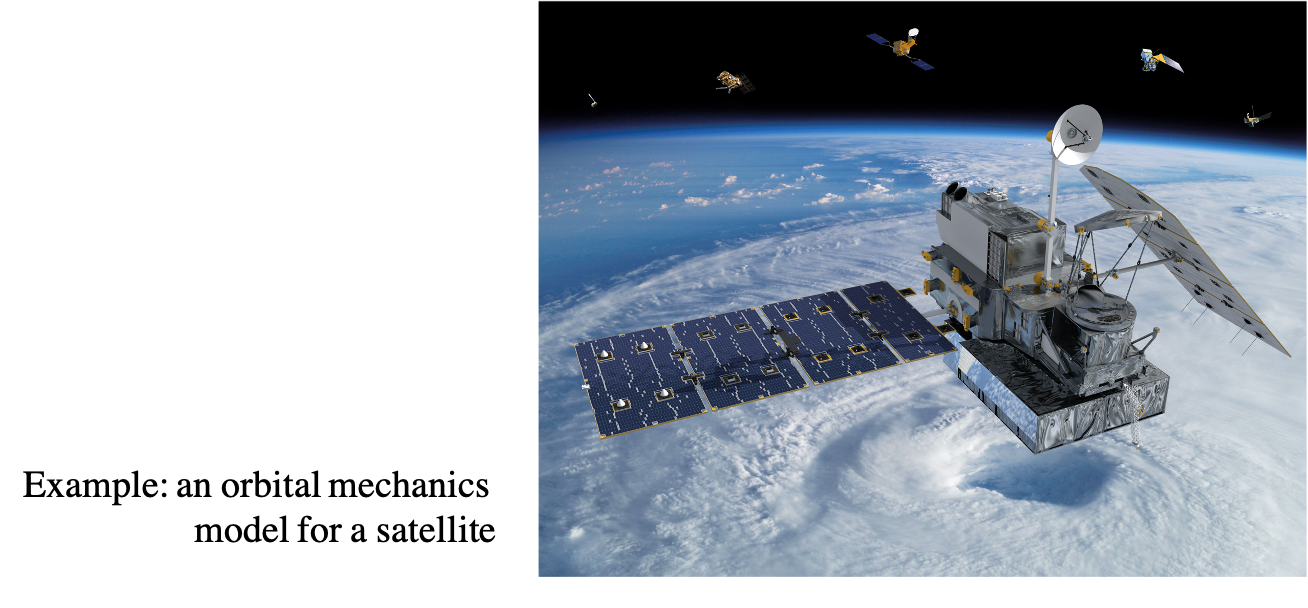

## How are models used?

2. Explore the feasibility of different ideas

Example: was circulation in the Cretaceous Western Interior Seaway clockwise or counter-clockwise? (Slingerland et al., 1996)

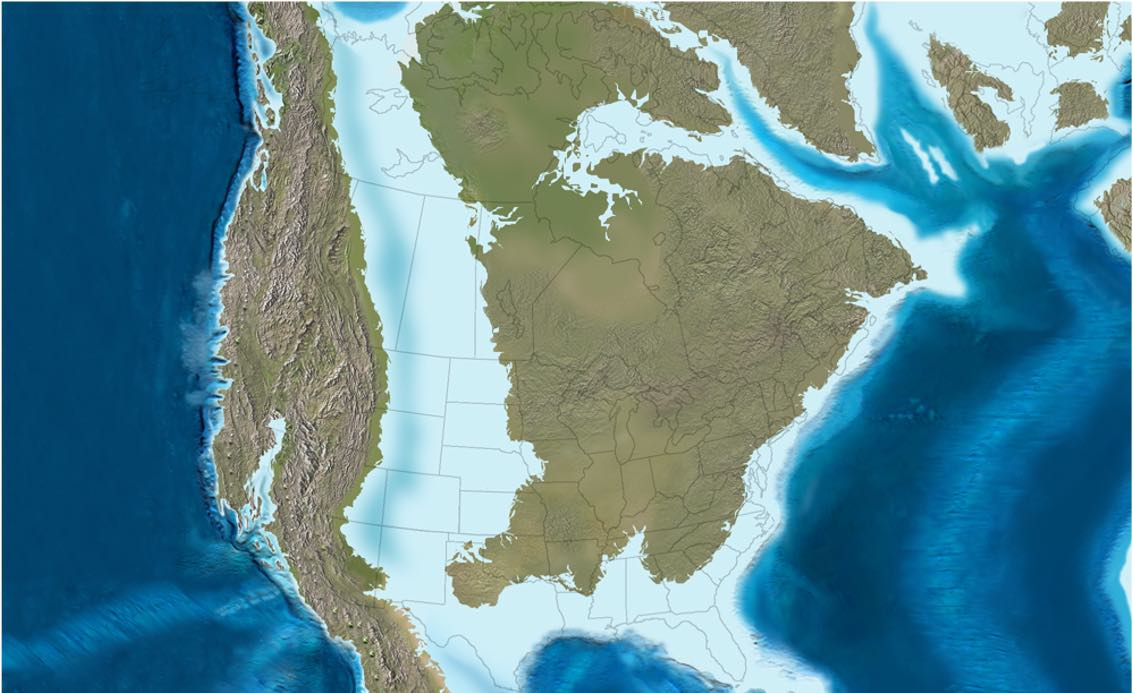

## How are models used?

3. Develop understanding by comparing models with data

Example: testing alternative models of steep hillslope evolution (from Roering, 2008)

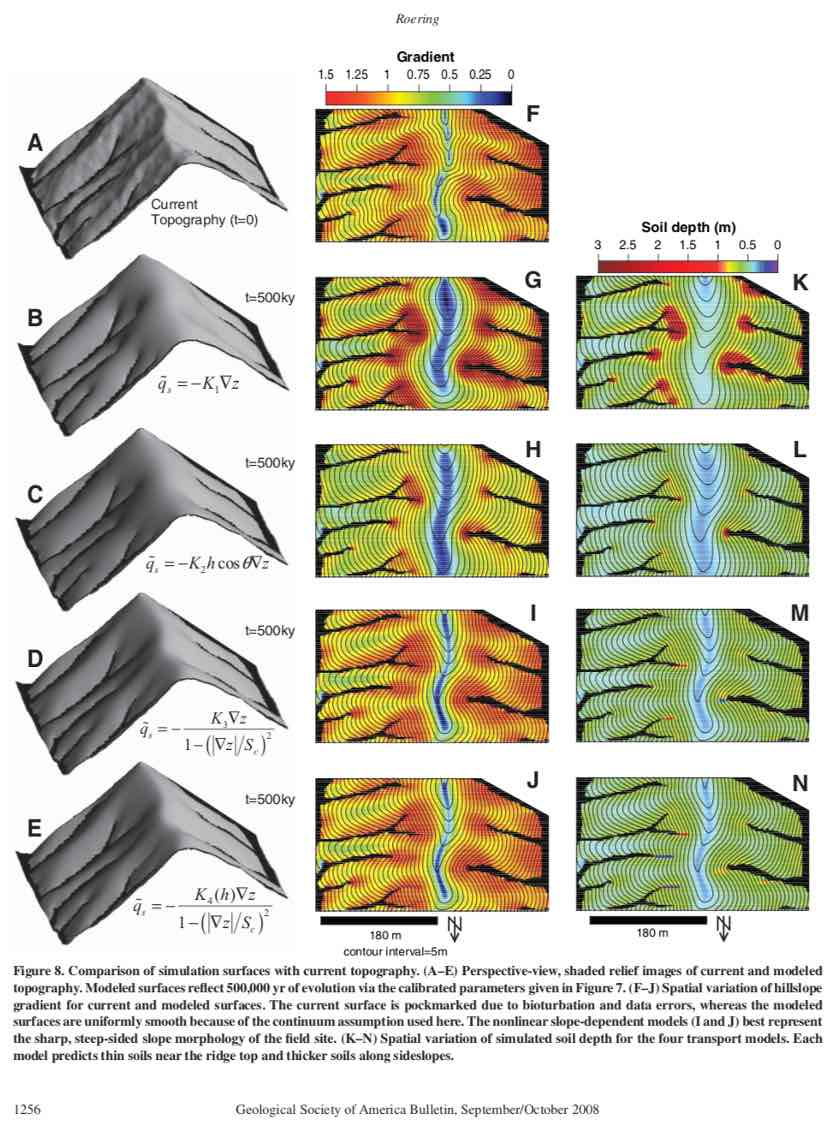

## How are models used?

4. Explore a new idea with a purely hypothetical model

Example: the logistic map equation as an example of deterministic chaos

$$x_{t+1} = r x_t (1 - x_t)$$ $x_t$ = population at generation $t$

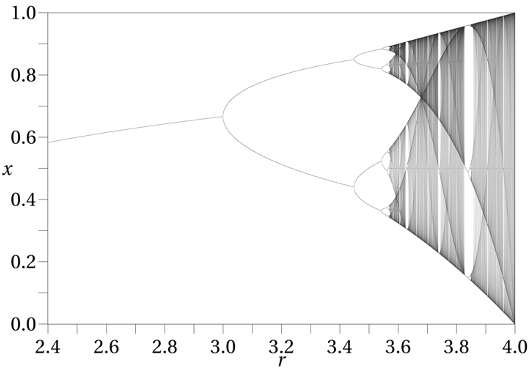


## Numerical models as approximate solutions to differential equations

A *differential equation* is one that contains one or more derivatives. Examples:

Radioactive decay can be represented by an *ordinary differential equation* (ODE) (the number of radioisotope atoms, $N$, varies with just one independent variable, $t$ [time])

$$\frac{dN}{dt} = -kN$$

Diffusion is represented by a *partial differential equation* (PDE) that we met in the last class (concentration $C$ varies with both time, $t$, and position $x$)

$$\frac{\partial C}{\partial t} = D \frac{\partial^2 C}{\partial x^2}$$

(Notation: $\partial C / \partial t$ means "rate of change in $C$ over time at a given position", and $\partial C / \partial x$ means "rate of change in $C$ over distance at a give instant in time".) 

## Analytical versus numerical solutions

An *analytical solution* is a mathematical equation that has the dependent variable on one side, and all other information on the other. For example, radioactive decay has the solution $N(t) = N_0 \exp(-kt)$.

But many differential equations do not have a general analytical solution.

A *numerical solution* is an approximation that calculates values for the dependent variable given a particular set of inputs.

In many cases, "numerical model" means a computer program that implements a numerical solution to one or more differential equations. For example, in the last class we experimented with a numerical solution to the one-dimensional diffusion equation.

## Numerical methods

There is an entire sub-discipline in applied mathematics and computational science called **numerical analysis**. People working in this field develop clever new **numerical methods** to solve various kinds of differential equations in an efficient and accurate way.

For example, go to the [CU Boulder catalog](https://classes.colorado.edu/) and search for the word "numerical". 

Needless to say, we are just going to quick peek into a huge world.

## The finite-difference method

### ODE examples

#### Radioactive decay

The **finite-difference method** works by replacing derivatives with finite differences. Example: radioactive decay:

$$\frac{dN}{dt} = -kN$$

Replace the time derivative with a finite difference: the change in $N$ from step $t$ to step $t+1$ divided by the time interval $\Delta t$, 

$$\frac{dN}{dt} \approx \frac{N_{t+1} - N_t}{\Delta t}$$

So:

$$\frac{N_{t+1} - N_t}{\Delta t} = -kN_t$$

Use algebra to rearrange to get $N_{t+1}$ by itself:

$$\boxed{N_{t+1} = N_t - \Delta t k N_t}$$

If we have a starting value of $N$ (at step 0), we can calculate the value at the next step, and then the next, and the next...

Let's write some code!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# parameters
N0 = 1.0e6 # start with 1 million atoms of 90Sr
half_life = 28.8 # 90Sr has a half-life of ~28.8 years
k = -np.log(1 / 2) / half_life # convert to decay coefficient, 1/years
dt = 1.0 # time-step size, years
nsteps = 200
 
# data structures?


# time loop


# print out the ending value of N


# plot N versus time


#### Temperature of a cubesat

Before launching a 0.1 m diameter cubesat, we want to make sure it doesn't overheat. 

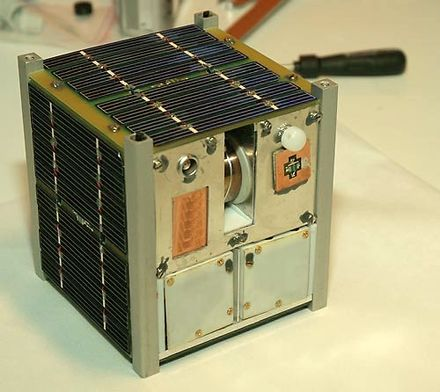

We have a differential equation model for the rate of change of its temperature, $T$, as a function of solar radiation (on one face) and radiative cooling:

$$\frac{dT}{dt} = \frac{S_0 (1-a)}{2b} - \frac{6 \sigma T^4}{b}$$

where:

$b = W\rho C_p$

$W =$ width of the cubesat, m (say 0.1)

$\rho = $ density of the cubesat, kg/m$^3$ (say 2000)
  
$C_p = $ specific heat of the cubesat, J/kg K (say 500)

$S_0 = $ solar irradiance, W/m$^2$ (1365)

$a = $ cubesat's albedo (say 0.5)

$\sigma = $ Stefan-Boltzmann constant, W / m$^2$ K$^4$ ($5.67\times 10^{-8}$)

Using a forward-difference approximation, here's our numerical approximation equation:

$$T_{t+1} = T_t + \Delta t \left(\frac{S_0 (1-a)}{2b} - \frac{6 \sigma T_t^4}{b}\right)$$


#### <div style="color:green">In-class practice</div>

Write a program to calculate the temperature of our cubesat over a number of time steps (enough for it to reach equilibrium). Plot the temperature versus time.

#### Review and a solution

    [NOTE: DID NOT GET TO THE BELOW IN CLASS FALL 2023; CARRYING FORWARD TO THE FOLLOWING CLASS]

## Revisiting diffusion

In the last class, you had a chance to learn about and experiment with a numerical model of chemical diffusion. Here we will explore the solution method a little more deeply.

### Example: benzene diffusion in a water pipe

Suppose we have a long, narrow water pipe. Benzene has accidentally leaked in to one end. How long will it take for the benzene to diffuse throughout the pipe?

#### The math

Last time, we met two equations that when combined give us the *diffusion equation*. Here we'll write them down separately.

First, we have an equation for the flow of benzene by diffusion, $q$, in kilograms of salt per square meter per second:

$$q = -D \frac{\partial C}{\partial x}$$

where $D$ is the diffusion coefficient (aka "diffusivity") in m$^2$/s, and $x$ here represents distance from the left side of the pipe.

Second, we have mass conservation:

$$\frac{\partial C}{\partial t} = -\frac{\partial q}{\partial x}$$

#### Dividing space into finite pieces

To calculate $q$ using a finite-difference approximation, we'll divide our pipe up into discrete pieces, or *cells*. In the middle of each cell is a point, called a *node*, where we'll keep track of $C$. Let's say we have 5 nodes:

```
Nodes:      0     1     2     3     4
            .--|--o--|--o--|--o--|--.

| = edge of a cell
o = interior node
. = boundary node
```

Nodes 0 and 4 are special: they are **boundary nodes**. We will impose the concentration at these locations. We will solve for the concentration at nodes 1, 2, and 3.


#### Finite-difference equations

**Notation**: $C_i^t$ means $C$ at node $i$ and time-step $t$.

**Mass conservation**: for node 1, we approximate the mass conservation equation above as:

$$\frac{C_1^{t+1} - C_1^t}{\Delta t} = -\frac{q_{3/2}^t - q_{1/2}^t}{\Delta x}$$

$\Delta t =$ time-step size (in sec), as before

$\Delta x =$ distance between nodes (in meters)

$q_{3/2}^t =$ ...huh?? Three halves? Yes. It's one and a half, and it means the position *halfway between node $1$ and node $2$*. That corresponds to the cell face between those nodes: a natural place to calculate the flux between them. This approach is called a *staggered-grid scheme*.

In general,

$$\frac{C_i^{t+1} - C_i^t}{\Delta t} = -\frac{q_{i+1/2}^t - q_{i-1/2}^t}{\Delta x}$$



**Mass flux:** the finite-difference version of our flux law is:

$$q_{i+1/2}^t = -D \frac{C_{i+1}^t - C_i^t}{\Delta x}$$

#### Testing out what we have so far

Let's write some code to set up our pipe and calculate the fluxes between nodes. We'll represent $C$ at the 5 nodes using a numpy array. We'll set the benzene concentration at node 0 to 1 kg/m$^3$, and zero at all the other nodes.

In [ ]:
C = np.zeros(5) # benzene concentration at the 5 nodes
C[0] = 1.0 # initial benzene concentration at node 0

Calculate the fluxes between nodes 0 and 1:

In [ ]:
D = 1.0e-5 # diffusion coefficient, m2/s
dx = 0.25 # distance between nodes, meters

# Calculate and print the flux from node 0 to node 1
q01 = -D * (C[1] - C[0]) / dx
print("Benzene flux from node 0 to node 1:", q01, " kg/m2-s")

# Try calculating flux for nodes 1 to 2


# ...and nodes 2 to 3


# ...and nodes 3 to 4



It would be convenient if we could calculate all the fluxes at once, and store all the values in an array.

To do this, we'll define an array called `q` that represents the fluxes *at the cell faces between each pair of nodes*. Quiz: how many array elements do we need?

In [ ]:
# Try it out: make a numpy array to hold the flux values


To calculate values for `q`, we want to take the *difference* in `C` at each adjacent pair of nodes. An easy way to do this is using the numpy `diff()` function.

In [ ]:
# Example of diff()
diff_C = np.diff(C)
print(diff_C)

**Try it yourself**: use `diff` to calculate values for flux at each node pair, by multiplying the difference by `-D` and dividing by the distance between nodes, `dx`:

In [ ]:
# (your code here)

## Review

- Ways models are used
- Differential equations; ordinary (ODE) vs. partial (PDE)
- Finite-difference method
- Forward differencing for an ODE
  - Radioactive decay
  - Warming/cooling of a cubesat
- Revisiting diffusion
  - Setting up a domain of nodes
  - Calculating differences with `np.diff()`
  - Calculating fluxes between nodes using `np.diff()`

## *Optional, if extra time: Diffusion continued*

Let's go back to mass conservation. With a little algebra, we can get $C_i^{t+1}$ - that is, *$C$ at the next time step - by itself:

$$C_i^{t+1} = C_i^t - \Delta t \left(\frac{q_{i+1/2}^t - q_{i-1/2}^t}{\Delta x}\right)$$

We know how to calculate $q$. How can we use numpy to calculate the piece in parentheses?

In [ ]:
# Recipe:
# - calculate q at the four cell edges
# - use np.diff() to calculate the difference in each pair of q
# - divide by node spacing (dx)
# - store the result in an array variable called dqdx
q = -D * np.diff(C) / dx # flux at the 4 cell edges
dqdx = np.diff(q) / dx # "divergence" of flux at 3 inner nodes

# Report the results
print("Fluxes at cell edges:", q)
print("Difference in q divided by dx:", dqdx)

### *Making sense of array sizes*

- $C$ has 5 elements, representing the 5 nodes.
- $q$ has 4 elements, representing the 4 cell faces between nodes
- $dqdx$ has 3 elements, representing the 3 interior nodes

```
.--|--o--|--o--|--o--|--.
0     1     2     3     4  <= C at 5 nodes
   0     1     2     3     <= q at 4 cell edges
      0     1     2        <= dqdx at 3 interior nodes
```

### *Updating $C$ for one time step*

We've now seen how to calculate the quantity in parenthese below:

$$C_i^{t+1} = C_i^t - \Delta t \left(\frac{q_{i+1/2}^t - q_{i-1/2}^t}{\Delta x}\right)$$

In our code, to update values of `C` for the new time step, we multiply `dqdx`by time-step size and subtract it from the current values of `C`. But we **only** do this for the interior values of `C`, which we can access like this:


In [ ]:
C[1:4] -= dt * dqdx
print("New values of C:", C)

### *Pseudocode for the solution algorithm*

We've seen each individual piece. Now we'll write out the complete solution algorithm, first using *pseudocode*:

```
# Initialize
Define parameters
Set up arrays

# Run
FOR each time step DO
    Calculate flux values at cell faces
    Calculate divergence (dqdx) at interior nodes
    Update C values for the new time step

# Finalize
Plot and/or report final values
```

### *Try it out*

Write a program that implements the above pseudocode!

### *Advanced challenge problems*

If all the above seems straightforward, try the following:

1. Combine the two finite-difference equations for diffusion together to show that

$$C_i^{t+1} = C_i^t + \frac{D\Delta t}{\Delta x^2} \left(C_{i+1}^t - 2 C_i^t + C_{i-1}^t \right)$$

2. Write a program that implements this solution. Hint: think about what the following numpy array operation does:

```
C[2:] - 2 * C[1:-1] + C[:-2]
```

3. Modify your program so that the $D$, $\Delta t$, and $\Delta x^2$ are combined in a single variable called `alpha`. Experiment with different values of this parameter. What does your calculation look like when `alpha = 0.2`? When `alpha = 1`? Look back to how we calculated time-step size in the previous class.